In [ ]:
# NOOR_UL_AIN_ZAHID
# FA24-BBD-069
# Section A

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from os import stat

In [49]:
# 1.LOAD DATASET
#(a)
titanic_df=pd.read_csv("Titanic-Dataset.csv")


In [50]:
# 1(b).
titanic_df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [51]:
#2. BASIC DATA Inspection
#2(a)
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
#2(b) 
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [69]:
#3 Handling missing values
#3(a).
titanic_df["Age"].fillna(titanic_df["Age"].median(),inplace=True)
titanic_df["Age"]
# colum is filled

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [71]:
#3(b) Dropping the Cabin Column
titanic_df.drop("Cabin",axis=1,inplace=True)

In [61]:
# checking data shape after dropping one column Cabin
titanic_df.shape

(891, 11)

In [62]:
#4.Duplicate Data
#4(a) Checking data
titanic_df.duplicated().sum()

0

In [63]:
#4 (a) Removing duplicates
titanic_df.drop_duplicates()
titanic_df.shape

(891, 11)

In [ ]:
#5. GROUPBY and Aggregation
#5(a) Groupby Average
titanic_df.groupby("Pclass")[["Fare","Age"]].mean()

,Fare,Age
Pclass,,
1,84.154687,36.812130
2,20.662183,29.765380
3,13.675550,25.932627


In [65]:
#5(b) Survival_rate
#Calculating
survival_rate=titanic_df.groupby("Sex")["Survived"].mean()
#Displaying
survival_rate

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [75]:
#6
cross_tab_data= pd.display_crosstab(titanic_df["Pclass"],titanic_df["Survived"],aggfunc="mean")
cross_tab_data

In [35]:
#7
Pivot_Table= titanic_df.pivot_table(index="Pclass",columns="Sex",values="Fare",aggfunc="mean")
Pivot_Table

Sex,female,male
Pclass,,
1,106.125798,67.226127
2,21.970121,19.741782
3,16.118810,12.661633


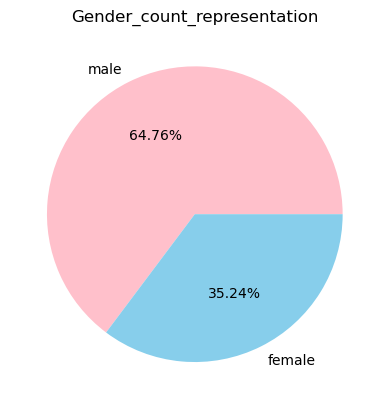

In [54]:
#8.Visulization
#8(a).Creating countplot for Sex Column
Graph=titanic_df["Sex"].value_counts()
plt.pie(Graph,labels=Graph.index,colors=["pink","skyblue"],autopct="%.2f%%")
plt.title("Gender_count_representation")
plt.show()

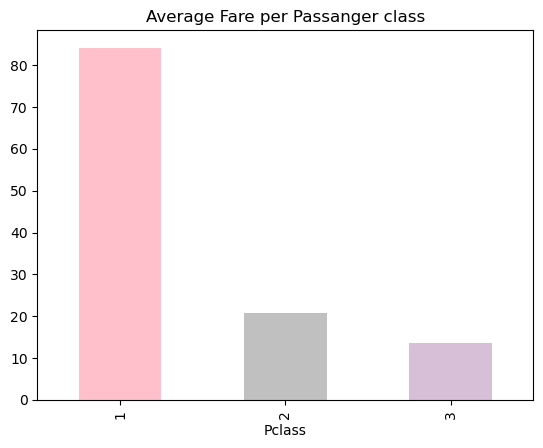

In [58]:
# 8(b) Barplot
graph=titanic_df.groupby("Pclass")["Fare"].mean()
graph.plot(x="Pclass",y="Fare",kind="bar",color=["pink","silver","thistle"])
plt.title("Average Fare per Passanger class")
plt.show()

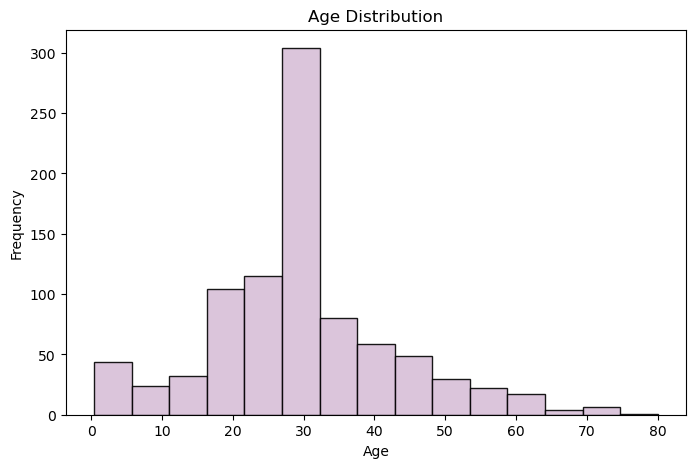

In [38]:
#8(c) Histogram for age distribution
plt.figure(figsize=[8,5])
plt.hist(titanic_df["Age"],bins=15,color="thistle",edgecolor="black",alpha=0.9)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()
# Interpretaion: Histogram will be best for showing age distribution.This plot shows that the passangers in titanic were mostly adults or young people of age betweem 20-40

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 23.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 56.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 78.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 32.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 63.0% of the points

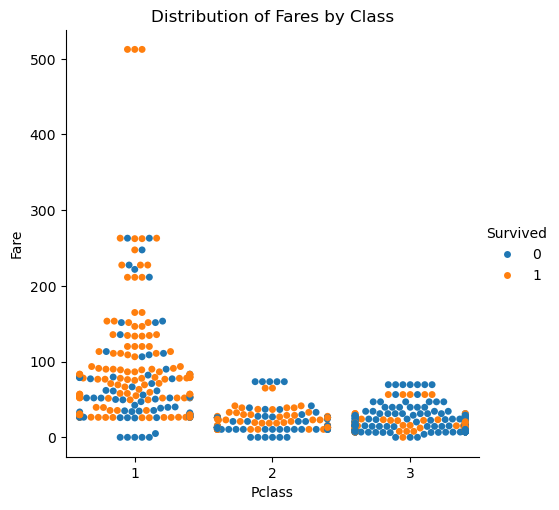

In [40]:
#8(d).Swarm Plot
sns.catplot(data=titanic_df,x="Pclass",y="Fare",hue="Survived",kind="swarm")
plt.title("Distribution of Fares by Class")
plt.show()

In [42]:
#9.Correlation
Graph=titanic_df[["Age","Survived","Fare"]].corr()
#Interpretation : Correlation can be found only between numerical data
# The correlation between age and survival is slightly negative (Young passangers were less likely to survive) 
# The correlation between fare and survived is slightly postive (People who gave more fare were more likely to survive)

,Age,Survived,Fare
Age,1.000000,-0.064910,0.096688
Survived,-0.064910,1.000000,0.257307
Fare,0.096688,0.257307,1.000000


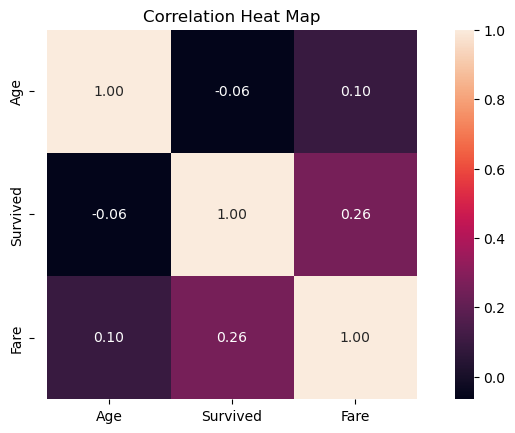

In [45]:
#9.
Graph=titanic_df[["Age","Survived","Fare"]].corr()
sns.heatmap(Graph, annot=True,fmt=".2f")
plt.title("Correlation Heat Map")
plt.axis('equal')
plt.show()
#Interpretation :
# The correlation between age and survival is slightly negative (Young passangers were less likely to survive) 
# The correlation between fare and survived is slightly postive (People who gave more fare were more likely to survive)